**Data Source:** https://www.kaggle.com/competitions/titanic

## **Data Description**

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

In this challenge, you have to build a predictive model that answers the question: “what sorts of people were more likely to survive?” 

**Variables**

* survived - Survival	( 0 = No, 1 = Yes )
* pclass -	Ticket class	( 1 = 1st, 2 = 2nd, 3 = 3rd )
* sex -	Sex	
* Age -	Age in years		
* ticket -	Ticket number	
* fare -	Passenger fare	
* cabin -	Cabin number	
* embarked - Port of Embarkation	
( C = Cherbourg, Q = Queenstown, S = Southampton )

* pclass -  A proxy for socio-economic status
(1st = Upper, 2nd = Middle, 3rd = Lower )

* sibsp - number of siblings / spouses aboard the Titanic
* parch - Number of parents / children aboard the Titanic



**Importing Libraries**

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing
import matplotlib.pyplot as plt
import seaborn as sns 

**Importing the Datasets**

In [2]:
train_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Titanic/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



 Number of Missing values

In [4]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
age_misssing=(177/891)*100
print("age_misssing_data: ",age_misssing)
cabin_misssing=(687/891)*100
print("cabin_misssing_data: ",cabin_misssing)

age_misssing_data:  19.865319865319865
cabin_misssing_data:  77.10437710437711


So, around 20% of age data is missing 
and 77% of cabin data is missing 

Text(0, 0.5, 'Number of passengers')

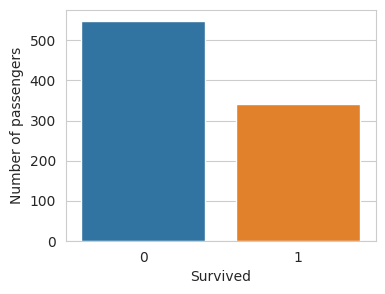

In [6]:
plt.figure(figsize=(4,3))
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=train_df)
plt.ylabel("Number of passengers")

Text(0, 0.5, 'Number of passengers')

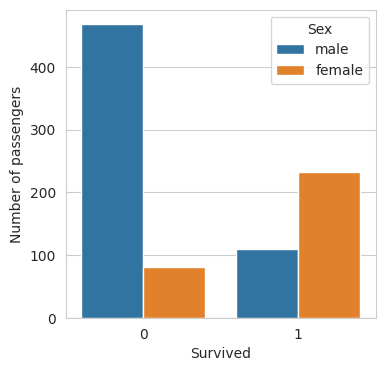

In [7]:
# Using Gender
plt.figure(figsize=(4,4))
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Sex",data=train_df)
plt.ylabel("Number of passengers")

The number of deaths of male passengers is around 4 times more than females.

While twice the number of females than male survived.

Text(0, 0.5, 'Number of passengers')

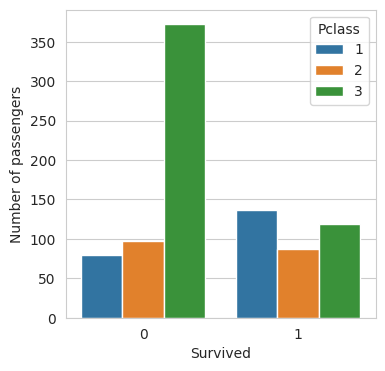

In [8]:
# Using Passanger class
plt.figure(figsize=(4,4))
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Pclass",data=train_df)
plt.ylabel("Number of passengers")

There are more number of deaths of passengers from class 3, Which is more than class 1 and 2 combined.

While the number of survivors are more in class 1.

<ipython-input-9-46ce660aea47>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df["Age"].dropna(),color='black',bins=40)


<Axes: xlabel='Age', ylabel='Density'>

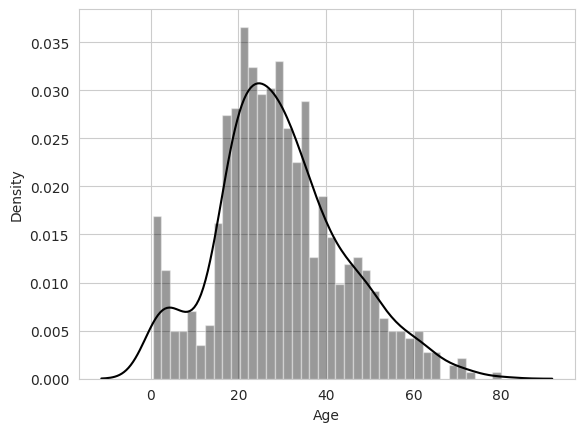

In [9]:
# Distribution plot of age 
# To check if age follows Normal distribution or not and what was the average age of the most of the people
sns.distplot(train_df["Age"].dropna(),color='black',bins=40)

<Axes: xlabel='Age', ylabel='Count'>

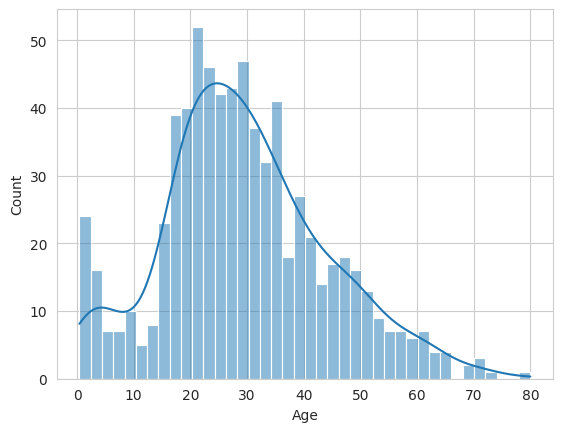

In [10]:
# Either plot can be used
sns.histplot(train_df["Age"].dropna(),kde=True,bins=40) #kde= kernel density estimation

Maximum number of people are from age group 10-30.

This is kind of Normal distribution.

In [11]:
train_df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Text(0, 0.5, 'Number of passengers')

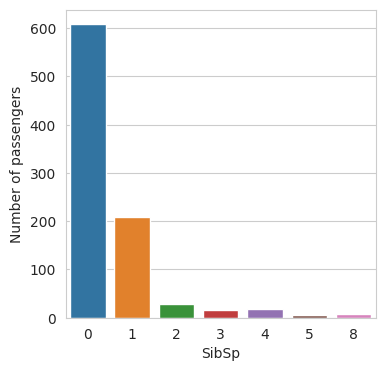

In [12]:
# Using siblings and spouse
plt.figure(figsize=(4,4))
sns.set_style("whitegrid")
sns.countplot(x="SibSp",data=train_df)
plt.ylabel("Number of passengers")

Most people where travelling without siblings and spouse

<Axes: xlabel='Fare', ylabel='Count'>

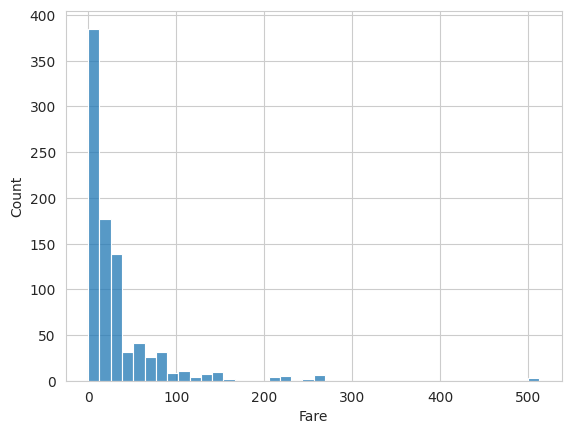

In [13]:
sns.histplot(train_df["Fare"],bins=40)

In [14]:
#check cuflinks

## **Data Cleaning**

We want to fill the missing values in age column. One way is that we use mean age of all passengers(imputation). However we can also check the average age by passenger class.

<Axes: xlabel='Pclass', ylabel='Age'>

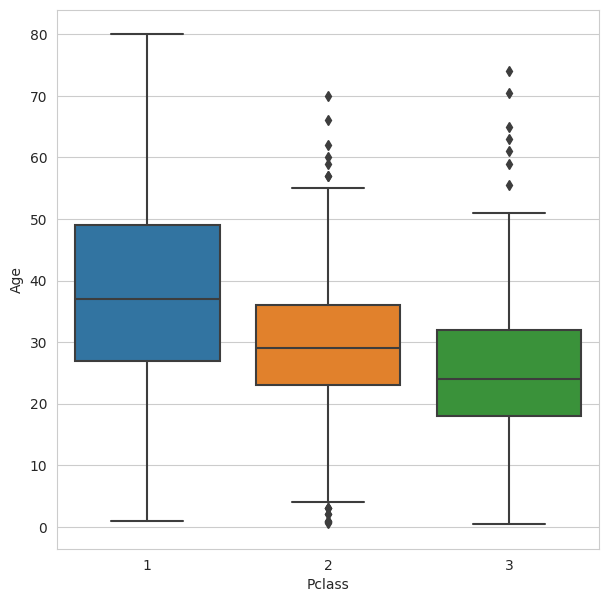

In [15]:
plt.figure(figsize=(7,7))
sns.boxplot(x="Pclass",y="Age",data=train_df)

We can see that passengers in the higher class are tend to be older.

In [16]:
# use this
train_df[train_df["Pclass"]==1]["Age"].median()

37.0

In [17]:
def impute_age(columns):
  Age = columns[0]
  Pclass= columns[1]

  if pd.isnull(Age):

    if Pclass==1:
      return 37
    elif Pclass==2:
      return 29
    else:
      return 24

  else:
    return Age

In [18]:
train_df['Age']=train_df[['Age','Pclass']].apply(impute_age,axis=1)

In [19]:
print("cabin_misssing_data: ",cabin_misssing)

cabin_misssing_data:  77.10437710437711


As we can see 77% of cabin data is missing we will drop it.
(We can also apply feature engineering)

In [20]:
train_df.drop("Cabin",axis=1,inplace=True)

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


So, we can see there are no missing values now.

In [22]:
# drop_first : bool, default False
# Whether to get k-1 dummies out of k categorical levels by removing the first level.

# Also giving list of columns as input so that it is done in once
train_df = pd.get_dummies(data=train_df,columns=["Sex","Embarked"],drop_first=True)

In [23]:
# or we can also do
# pd.get_dummies(train_df["Embarked"],drop_first=True).head()

In [24]:
# Sex = pd.get_dummies(train_df["Sex"],drop_first=True)
# Embarked = pd.get_dummies(train_df["Embarked"],drop_first=True)

In [25]:
# train_df = pd.concat((train_df,Sex,Embarked),axis=1)

In [26]:
train_df.drop(["Name","Ticket"],axis=1,inplace=True)

In [27]:
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_male     891 non-null    uint8  
 8   Embarked_Q   891 non-null    uint8  
 9   Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


In [29]:
y_train = train_df["Survived"]

In [30]:
x_train = train_df.drop("Survived",axis=1)

In [31]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

**Loading the test data**

In [32]:
test_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Titanic/test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Repeating the same data cleaning process on test data

In [33]:
test_df['Age']=test_df[['Age','Pclass']].apply(impute_age,axis=1)

In [34]:
test_df.drop(["Cabin","Name","Ticket"],axis=1,inplace=True)

In [35]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

There is still 1 Nan value in Fare column. 
We will replace it by mean. 

In [36]:
mean_fare = test_df['Fare'].mean()
test_df.fillna(mean_fare,axis=0,inplace=True)

In [37]:
x_test = pd.get_dummies(data=test_df,columns=["Sex","Embarked"],drop_first=True)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   Sex_male     418 non-null    uint8  
 7   Embarked_Q   418 non-null    uint8  
 8   Embarked_S   418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


**Loading the Gender_Submission file which will be used as y_test**


In [38]:
submission_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Titanic/gender_submission.csv")
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [39]:
y_test = submission_df["Survived"]

In [40]:
x_train.shape, y_train.shape

((891, 9), (891,))

In [41]:
x_test.shape, y_test.shape

((418, 9), (418,))

## **Training and Predicting**

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
predictions = logmodel.predict(x_test)

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [46]:
cf = confusion_matrix(y_test,predictions)
cf

array([[250,  16],
       [  1, 151]])

In [47]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.9593301435406698

**Reference:** (1) https://github.com/krishnaik06/EDA1